In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_img(img, title=None, cmap="gray", show=True):
    plt.imshow(img, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    if show:
        plt.show()

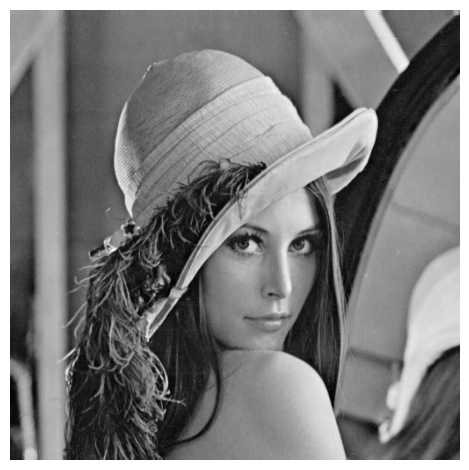

In [3]:
img = cv2.imread('Lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_img(img)

In [4]:
def convolve2d(image, kernel, padding=1, strides=1):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    image = np.pad(image, padding, mode='constant', constant_values=0)
    for y in range(0, yOutput):
        for x in range(0, xOutput):
            output[x][y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
    return output

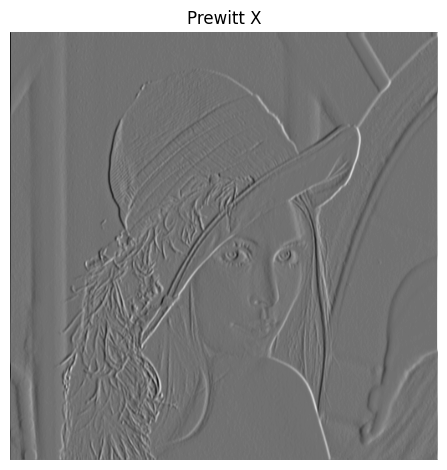

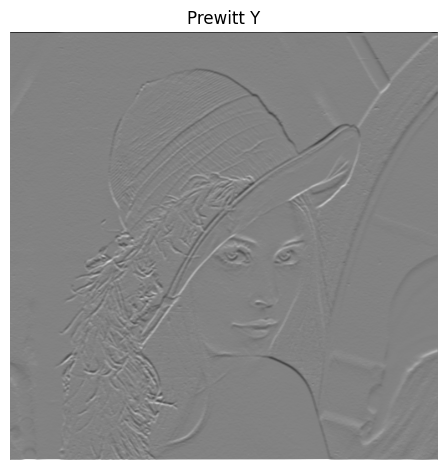

In [5]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
grad_x = convolve2d(img, prewitt_x)
grad_y = convolve2d(img, prewitt_y)
# print(grad_x.shape, grad_y.shape)
plot_img(grad_x, "Prewitt X")
plot_img(grad_y, "Prewitt Y")

In [6]:
def binary_threshold(grad_x, grad_y, threshold):
    img = np.zeros_like(grad_x)
    img[np.sqrt(grad_x**2 + grad_y**2) > threshold] = 1
    return img

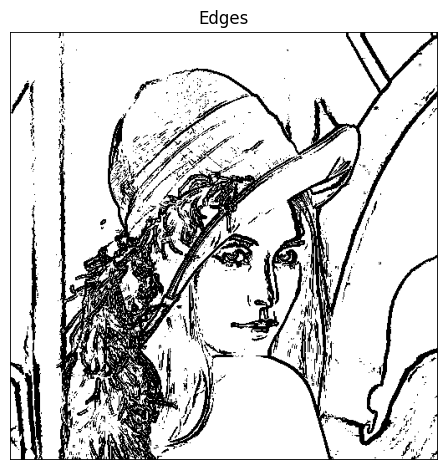

In [7]:
edges = binary_threshold(grad_x, grad_y, 50)
plot_img(edges, "Edges", cmap="binary")

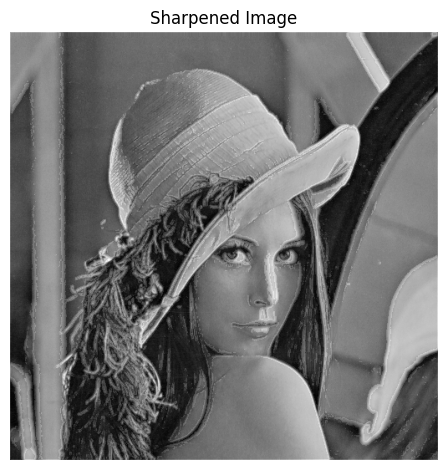

In [8]:
def sharpen(img, edges, c):
    img = img + c * edges
    return img

sharpened_img = sharpen(img, edges, c=30)
plot_img(sharpened_img, "Sharpened Image")

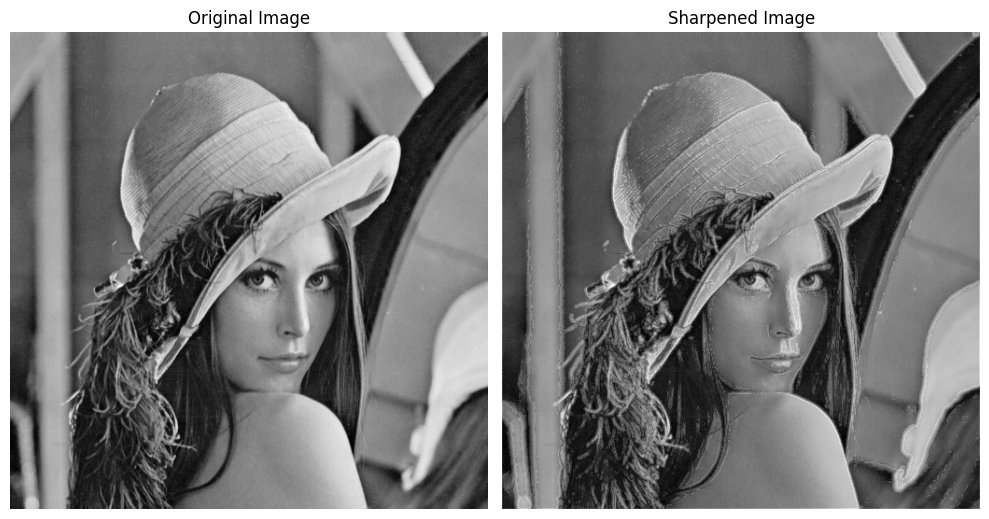

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plot_img(img, "Original Image", show=False)
plt.subplot(1, 2, 2)
plot_img(sharpened_img, "Sharpened Image", show=False)
plt.show()